In [1]:
import pandas as pd

# ruta de tu archivo Excel y el nombre de la hoja

nombre_de_la_hoja = "BaseDatos"

df_colegios = pd.read_excel("BaseDatos.xlsx", sheet_name=nombre_de_la_hoja)


print(f"Se han leído exitosamente {len(df_colegios)} filas de colegios de la hoja '{nombre_de_la_hoja}'.")

# Muestra las primeras 5 filas para que tengas una idea de cómo se ven los datos.
print("\nPrimeras 5 filas de tu base de datos de colegios:")
print(df_colegios.head())

# Muestra un resumen general de las columnas, incluyendo los tipos de datos y si tienen valores nulos.
print("\nInformación de las columnas del DataFrame:")
df_colegios.info()

Se han leído exitosamente 2236 filas de colegios de la hoja 'BaseDatos'.

Primeras 5 filas de tu base de datos de colegios:
   No.  #_LOC MOMBRE_LOCALIDAD  DANE11_ESTABLECIMIENTO_EDUCATIVO  \
0    1      1          USAQUEN                      1.110010e+10   
1    2      1          USAQUEN                      1.110013e+10   
2    3      1          USAQUEN                      1.110013e+10   
3    4      1          USAQUEN                      1.110013e+10   
4    5      1          USAQUEN                      1.110013e+10   

   DANE12_ESTABLECIMIENTO_EDUCATIVO NOMBRE_ESTABLECIMIENTO_EDUCATIVO  \
0                      111001000132      COLEGIO AQUILEO PARRA (IED)   
1                      111001029955  COLEGIO AGUSTIN FERNANDEZ (IED)   
2                      111001029955  COLEGIO AGUSTIN FERNANDEZ (IED)   
3                      111001029955  COLEGIO AGUSTIN FERNANDEZ (IED)   
4                      111001029955  COLEGIO AGUSTIN FERNANDEZ (IED)   

   NIT  (DISTRITALES NIT FSE) DANE

In [2]:
print("\n¿Hay valores faltantes en alguna columna de tus datos? (True significa que sí hay):")
print(df_colegios.isnull().any())


¿Hay valores faltantes en alguna columna de tus datos? (True significa que sí hay):
No.                                                                   False
#_LOC                                                                 False
MOMBRE_LOCALIDAD                                                      False
DANE11_ESTABLECIMIENTO_EDUCATIVO                                       True
DANE12_ESTABLECIMIENTO_EDUCATIVO                                      False
NOMBRE_ESTABLECIMIENTO_EDUCATIVO                                      False
NIT  (DISTRITALES NIT FSE)                                             True
DANE11_SEDE_EDUCATIVA                                                  True
DANE12_SEDE_EDUCATIVA                                                 False
NOMBRE_SEDE_EDUCATIVA                                                 False
CONSECUTIVO                                                           False
ORDEN DE SEDE                                                         False
SEC

In [3]:
print("\n¿Hay valores faltantes en alguna columna de tus datos? (True significa que sí hay):")
print(df_colegios.isnull().any())
df_colegios_limpio = df_colegios.fillna("N/A")
print("\n--- ¡Valores vacíos reemplazados por 'N/A'! ---")

print("\nPrimeras 5 filas DESPUÉS de reemplazar los valores vacíos (NaN) por 'N/A':")
print(df_colegios_limpio.head())



¿Hay valores faltantes en alguna columna de tus datos? (True significa que sí hay):
No.                                                                   False
#_LOC                                                                 False
MOMBRE_LOCALIDAD                                                      False
DANE11_ESTABLECIMIENTO_EDUCATIVO                                       True
DANE12_ESTABLECIMIENTO_EDUCATIVO                                      False
NOMBRE_ESTABLECIMIENTO_EDUCATIVO                                      False
NIT  (DISTRITALES NIT FSE)                                             True
DANE11_SEDE_EDUCATIVA                                                  True
DANE12_SEDE_EDUCATIVA                                                 False
NOMBRE_SEDE_EDUCATIVA                                                 False
CONSECUTIVO                                                           False
ORDEN DE SEDE                                                         False
SEC

In [4]:
conteo_por_localidad = df_colegios.groupby('MOMBRE_LOCALIDAD').size().reset_index(name='Cantidad_Colegios')

print("\n--- Conteo de Colegios por Localidad ---")
# Ordenamos la tabla para ver las localidades con más colegios primero (de mayor a menor).
x = conteo_por_localidad.sort_values(by='Cantidad_Colegios', ascending=False)
print(x)


--- Conteo de Colegios por Localidad ---
      MOMBRE_LOCALIDAD  Cantidad_Colegios
14                SUBA                362
7              KENNEDY                264
5             ENGATIVA                258
2                 BOSA                147
4       CIUDAD BOLIVAR                147
18             USAQUEN                132
12       SAN CRISTOBAL                128
11  RAFAEL URIBE URIBE                123
19                USME                109
10       PUENTE ARANDA                100
6             FONTIBON                 98
17          TUNJUELITO                 69
1       BARRIOS UNIDOS                 63
16         TEUSAQUILLO                 59
0       ANTONIO NARIÑO                 43
9         LOS MARTIRES                 36
13             SANTAFE                 29
3            CHAPINERO                 26
15             SUMAPAZ                 24
8        LA CANDELARIA                 19


In [5]:
print("¿Cuántos colegios hay en total en la base de datos?")
print(len(df_colegios))
print("¿Cuáles son las 5 localidades con más colegios?")
print(x.head(5))
print("¿Cuántos colegios son OFICIALES y cuántos no?")
print(df_colegios.groupby("SECTOR").size())

¿Cuántos colegios hay en total en la base de datos?
2236
¿Cuáles son las 5 localidades con más colegios?
   MOMBRE_LOCALIDAD  Cantidad_Colegios
14             SUBA                362
7           KENNEDY                264
5          ENGATIVA                258
2              BOSA                147
4    CIUDAD BOLIVAR                147
¿Cuántos colegios son OFICIALES y cuántos no?
SECTOR
NO OFICIAL    1471
OFICIAL        765
dtype: int64


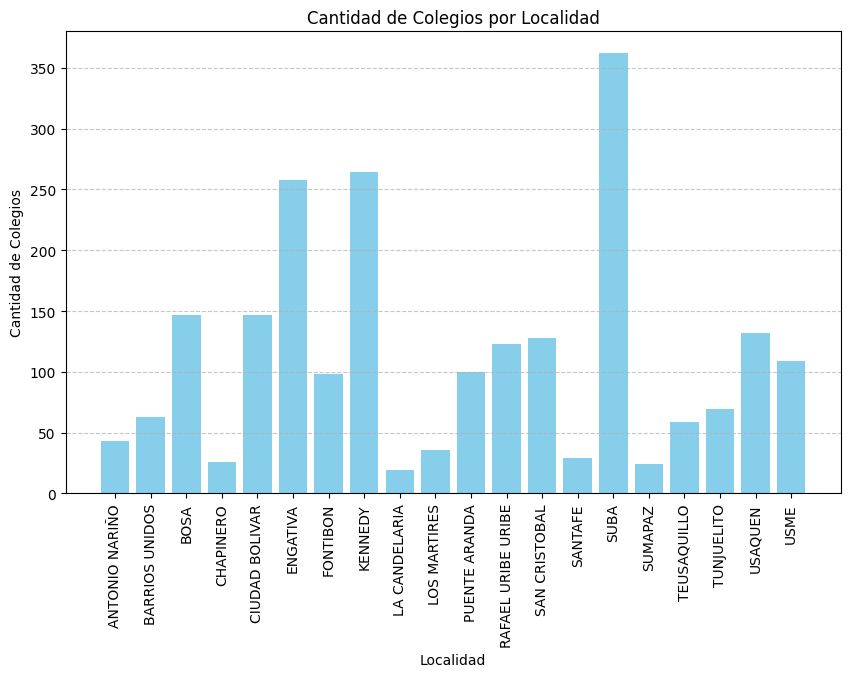

In [7]:
import matplotlib.pyplot as plt

# Crear la gráfica de barras
plt.figure(figsize=(10, 6))
plt.bar(conteo_por_localidad["MOMBRE_LOCALIDAD"], conteo_por_localidad["Cantidad_Colegios"], color="skyblue")

# Personalizar la gráfica
plt.xlabel("Localidad")
plt.ylabel("Cantidad de Colegios")
plt.title("Cantidad de Colegios por Localidad")
plt.xticks(rotation=90)  # Rotar etiquetas para mejor visualización
plt.grid(axis="y", linestyle="--", alpha=0.7)

# Mostrar la gráfica
plt.show()
